# INTRODUCTION TO DATA VISUALIZATION WITH PYTHON SEABORN

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification

from sklearn.preprocessing import Normalizer
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neural_network import MLPClassifier as MLPC

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

from toolbox.tools import *

import statsmodels.api as sm

In [3]:
df_gm = pd.read_csv('data\\dataframe.csv')
df_ml = pd.read_csv('data\\dataframe_ml.csv')
df_ts = generate_time_series(len_series=100, n_conditions=2, n_individuals=100)
df_ln = generate_linear(n_individuals=30, n_conditions=2)
df_pl = generate_poly(n_individuals=30, n_conditions=2, order = 3)

## INTRODUCTION

For the start of this workshop, we will work briefly (and unoriginally) with a basic dataset of games sales and metacritic ratings provided by [Rush Kirubi](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings). 

In [4]:
nba_df = pd.read_csv('data\\nba.csv')

### Exploratory Analysis & Visualisation - Example Dataset with NBA Players

In [5]:
nba_df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
0,1,Alex Abrines\abrinal01,SG,24,OKC,75,8,15.1,1.5,3.9,...,0.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
1,2,Quincy Acy\acyqu01,PF,27,BRK,70,8,19.4,1.9,5.2,...,0.817,0.6,3.1,3.7,0.8,0.5,0.4,0.9,2.1,5.9
2,3,Steven Adams\adamsst01,C,24,OKC,76,76,32.7,5.9,9.4,...,0.559,5.1,4.0,9.0,1.2,1.2,1.0,1.7,2.8,13.9
3,4,Bam Adebayo\adebaba01,C,20,MIA,69,19,19.8,2.5,4.9,...,0.721,1.7,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9
4,5,Arron Afflalo\afflaar01,SG,32,ORL,53,3,12.9,1.2,3.1,...,0.846,0.1,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4


In [6]:
nba_df.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
count,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,660.000000,664.00000,664.000000,...,606.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.00000,664.000000,664.000000,664.000000
mean,270.823795,26.194277,43.280120,19.707831,18.637500,2.942018,6.539608,0.441359,0.77756,2.217922,...,0.741058,0.750301,2.511747,3.260090,1.744729,0.600000,0.35000,1.054066,1.583735,7.895030
std,154.830333,4.127665,27.743598,26.615675,9.306127,2.098904,4.471864,0.122191,0.77679,2.001853,...,0.147869,0.706467,1.778643,2.346761,1.672275,0.441784,0.36729,0.800480,0.773334,5.799271
min,1.000000,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,139.000000,23.000000,17.000000,0.000000,11.300000,1.400000,3.100000,0.395000,0.10000,0.500000,...,0.667000,0.300000,1.200000,1.700000,0.600000,0.300000,0.10000,0.500000,1.000000,3.575000
50%,266.500000,26.000000,46.000000,4.000000,18.600000,2.500000,5.500000,0.440000,0.60000,1.700000,...,0.768000,0.500000,2.200000,2.800000,1.200000,0.500000,0.30000,0.900000,1.600000,6.550000
75%,401.250000,29.000000,71.000000,35.000000,26.100000,4.200000,9.300000,0.493000,1.30000,3.500000,...,0.833000,1.000000,3.300000,4.400000,2.300000,0.800000,0.50000,1.400000,2.100000,11.400000
max,540.000000,41.000000,82.000000,82.000000,36.900000,10.500000,21.100000,1.000000,4.20000,10.000000,...,1.000000,5.100000,10.900000,16.000000,10.300000,2.400000,2.60000,5.000000,4.000000,30.400000


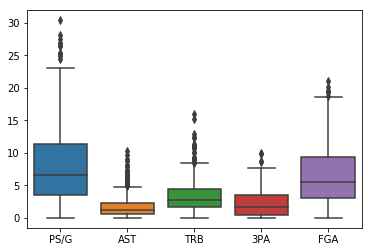

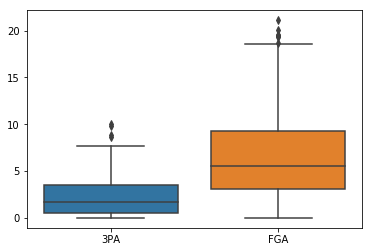

In [7]:
boxplot_df = nba_df.loc[: ,['PS/G', 'AST', 'TRB', '3PA', 'FGA']]
sns.boxplot(data=boxplot_df)
plt.show()

boxplot_df = boxplot_df.drop(['PS/G', 'AST', 'TRB'], axis=1)
sns.boxplot(data=boxplot_df)
plt.show()

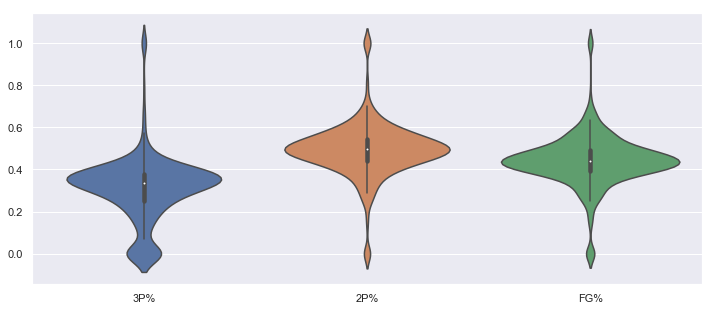

In [8]:
sns.set(font_scale=1, style = 'darkgrid', context='notebook', rc={"figure.figsize": (12, 5)})
violinplot_df = nba_df.loc[: ,['3P%', '2P%', 'FG%']]
sns.violinplot(data=violinplot_df)
plt.show()

In [9]:
nba_df['Position'] = nba_df['Pos']
nba_df['Pos'] = nba_df.Pos.astype('category').cat.codes.astype(np.int64)
nba_df.fillna(0)
nba_df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G,Position
0,1,Alex Abrines\abrinal01,6,24,OKC,75,8,15.1,1.5,3.9,...,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7,SG
1,2,Quincy Acy\acyqu01,1,27,BRK,70,8,19.4,1.9,5.2,...,0.6,3.1,3.7,0.8,0.5,0.4,0.9,2.1,5.9,PF
2,3,Steven Adams\adamsst01,0,24,OKC,76,76,32.7,5.9,9.4,...,5.1,4.0,9.0,1.2,1.2,1.0,1.7,2.8,13.9,C
3,4,Bam Adebayo\adebaba01,0,20,MIA,69,19,19.8,2.5,4.9,...,1.7,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9,C
4,5,Arron Afflalo\afflaar01,6,32,ORL,53,3,12.9,1.2,3.1,...,0.1,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4,SG


In [10]:
nba_df['Position'].value_counts()

SG       156
PG       142
C        126
PF       122
SF       115
SF-SG      2
PG-SG      1
Name: Position, dtype: int64

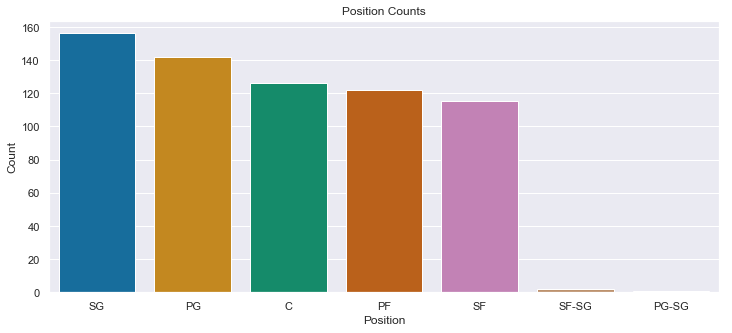

In [11]:
sns.set(font_scale=1, style = 'darkgrid', context='notebook', rc={"figure.figsize": (12, 5)})
# Create an order variable to sort by descending
pos_desc = nba_df['Position'].value_counts().sort_values(ascending=False).index

pos_countplot = sns.countplot(x='Position', data=nba_df, order=pos_desc, palette="colorblind")
plt.title('Position Counts')
plt.xlabel('Position')
plt.ylabel('Count')
plt.show()

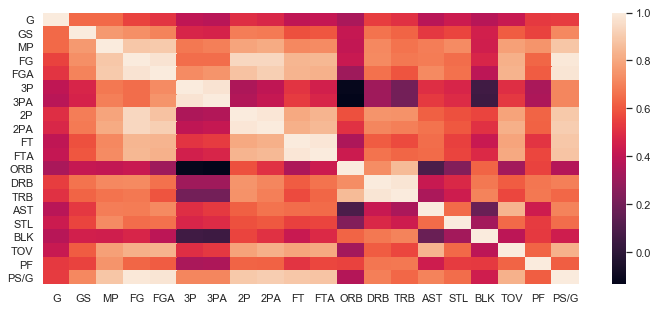

In [12]:
corrmat_df = nba_df.drop(['Rk', 'Player', 'Pos', 'Tm', 'Age',
                         '2P%', '3P%', 'FG%', 'FT%', 'eFG%'], axis=1)
corrmat = corrmat_df.corr()
sns.heatmap(corrmat)
plt.show()

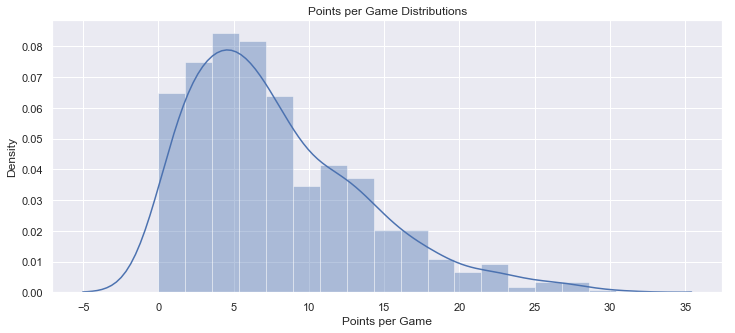

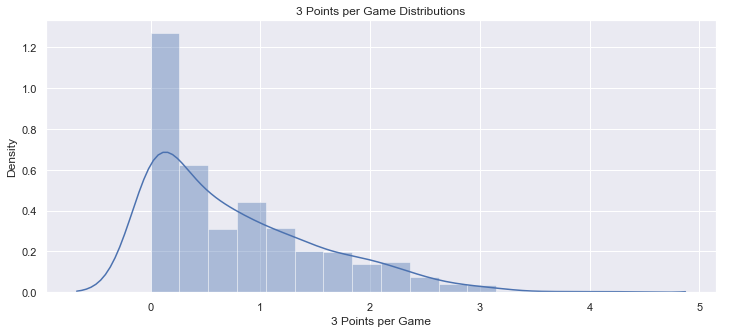

In [13]:
### sns.set(font_scale=1, style = 'darkgrid', context='notebook')

psg_distplot = sns.distplot(nba_df['PS/G'], label='Points per Game')
plt.title('Points per Game Distributions')
plt.xlabel('Points per Game')
plt.ylabel('Density')
plt.show()

p3_distplot = sns.distplot(nba_df['3P'], label='3 Points per Game')
plt.title('3 Points per Game Distributions')
plt.xlabel('3 Points per Game')
plt.ylabel('Density')
plt.show()

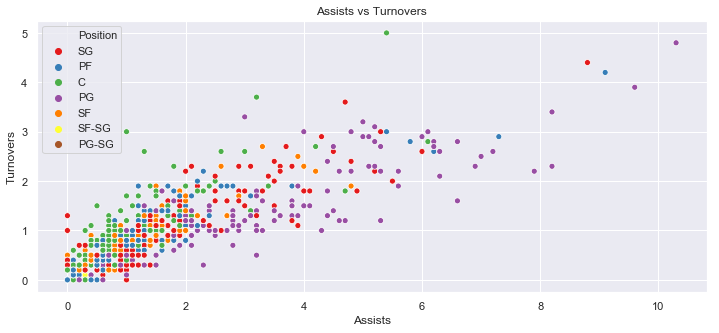

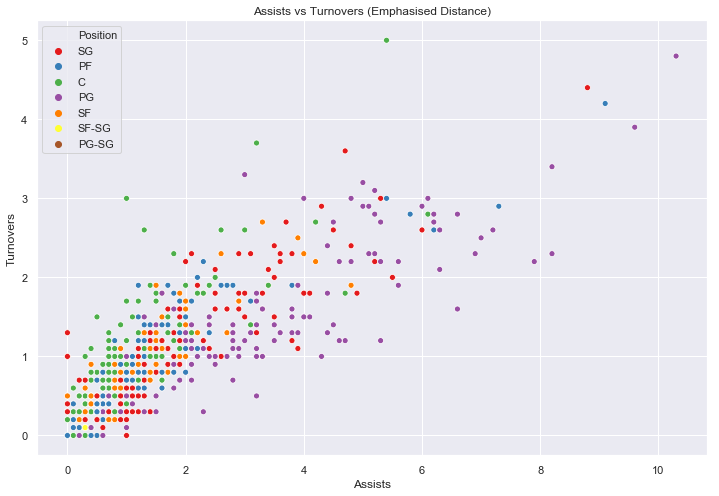

In [14]:
scoring_scatterplot = sns.scatterplot(x='AST', y='TOV', hue='Position', palette='Set1', data=nba_df)
plt.title('Assists vs Turnovers')
plt.xlabel('Assists')
plt.ylabel('Turnovers')
plt.show()

sns.set(font_scale=1, style = 'darkgrid', context='notebook', rc={"figure.figsize": (12, 8)})
scoring_scatterplot = sns.scatterplot(x='AST', y='TOV', hue='Position', palette='Set1', data=nba_df)
plt.title('Assists vs Turnovers (Emphasised Distance)')
plt.xlabel('Assists')
plt.ylabel('Turnovers')
plt.show()

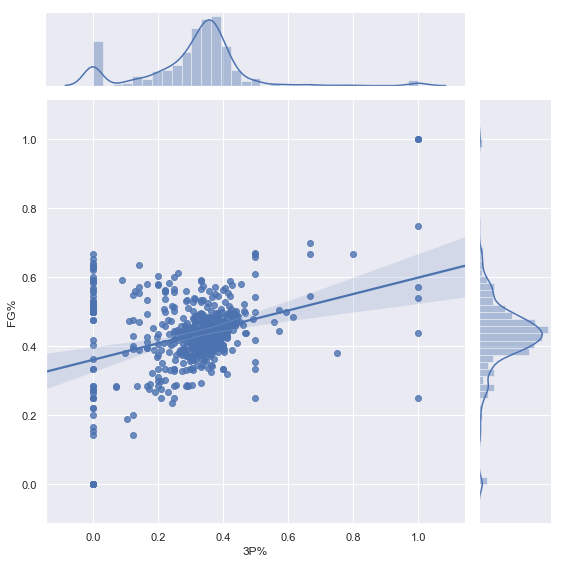

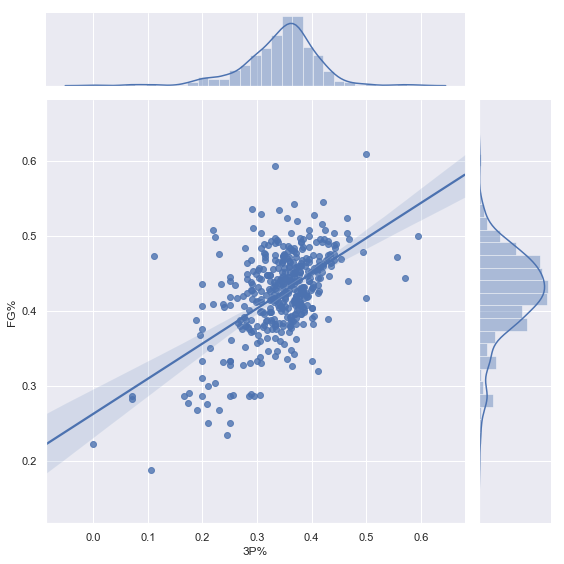

In [15]:
sns.set(font_scale=1, style = 'darkgrid', context='notebook')
scoring_jointplot = sns.jointplot(x='3P%', y='FG%', height=8, kind='reg', data=nba_df)
plt.show()

nba_df = nba_df.ix[nba_df['3PA']>1] 
sns.set(font_scale=1, style = 'darkgrid', context='notebook')
scoring_jointplot = sns.jointplot(x='3P%', y='FG%', height=8, kind='reg', data=nba_df)
plt.show()

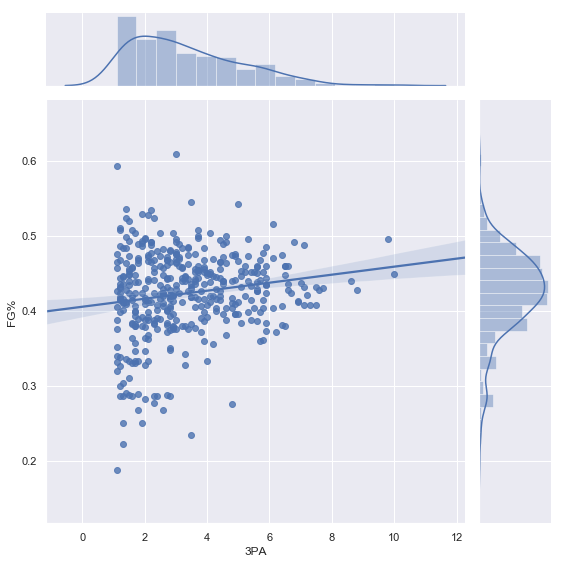

In [16]:
scoring_jointplot = sns.jointplot(x='3PA', y='FG%', height=8, kind='reg', data=nba_df)
plt.show()

In [17]:
god_shooters = nba_df.ix[nba_df['3PA']>8] 
print(god_shooters)

      Rk                    Player  Pos  Age   Tm   G  GS    MP   FG   FGA  \
146  120   Stephen Curry\curryst01    2   29  GSW  51  51  32.0  8.4  16.9   
216  180     Eric Gordon\gordoer01    6   29  HOU  69  30  31.2  6.0  14.1   
232  194    James Harden\hardeja01    6   28  HOU  72  72  35.4  9.0  20.1   
369  298  Damian Lillard\lillada01    2   27  POR  73  73  36.6  8.5  19.4   

       ...     ORB  DRB  TRB  AST  STL  BLK  TOV   PF  PS/G  Position  
146    ...     0.7  4.4  5.1  6.1  1.6  0.2  3.0  2.2  26.4        PG  
216    ...     0.4  2.1  2.5  2.2  0.6  0.4  1.9  1.7  18.0        SG  
232    ...     0.6  4.8  5.4  8.8  1.8  0.7  4.4  2.3  30.4        SG  
369    ...     0.8  3.6  4.5  6.6  1.1  0.4  2.8  1.6  26.9        PG  

[4 rows x 31 columns]


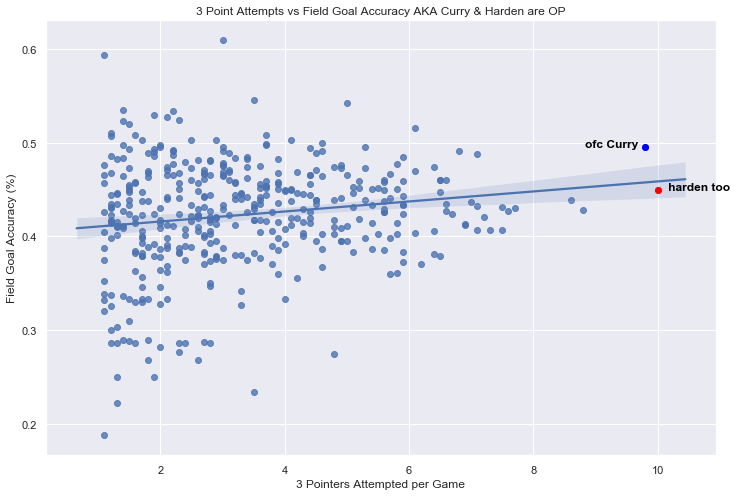

In [18]:
curry_x = nba_df.loc[146, '3PA']
curry_y = nba_df.loc[146, 'FG%']
harden_x = nba_df.loc[232, '3PA']
harden_y = nba_df.loc[232, 'FG%']
scoring_scatterplot = sns.regplot(x='3PA', y='FG%', data=nba_df)
scoring_overlay = plt.scatter(curry_x, curry_y, color = 'blue')
scoring_overlay = plt.scatter(harden_x, harden_y, color = 'red')
scoring_scatterplot.text(curry_x, curry_y, 'ofc Curry  ', 
                         horizontalalignment='right', size='medium', color='black', weight='semibold')
scoring_scatterplot.text(harden_x, harden_y, '   harden too', 
                         horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.title('3 Point Attempts vs Field Goal Accuracy AKA Curry & Harden are OP')
plt.xlabel('3 Pointers Attempted per Game')
plt.ylabel('Field Goal Accuracy (%)')
plt.show()

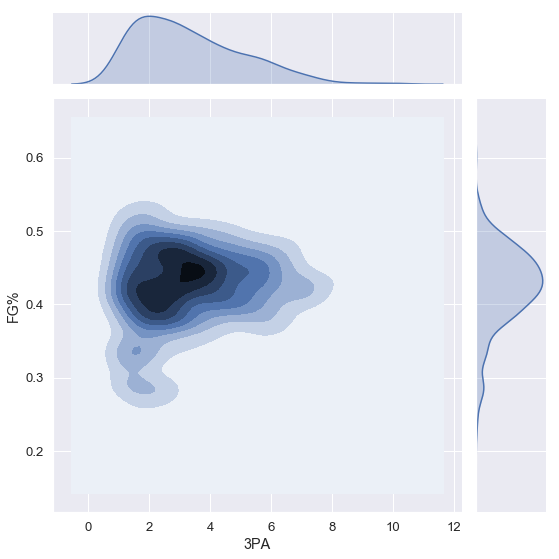

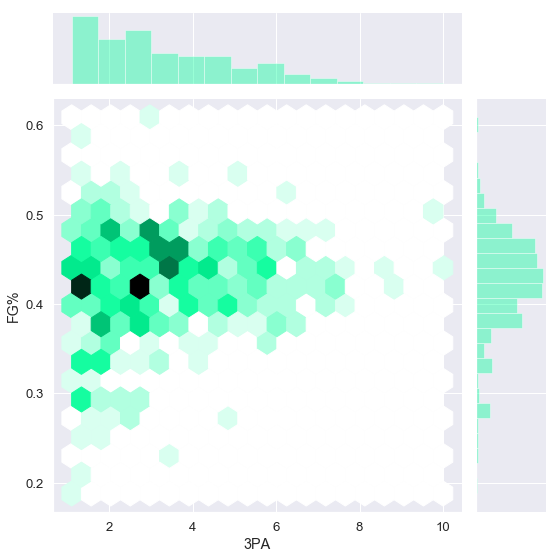

In [59]:
scoring_jointplot = sns.jointplot(x='3PA', y='FG%', height=8, kind='kde', data=nba_df)
plt.show()

scoring_jointplot = sns.jointplot(x='3PA', y='FG%', height=8, kind='hex', color='#00ff99',data=nba_df)
plt.show()

TODO: 
* Ridgeplot
* Annotations
* Maybe matplotlib basics?

## EXERCISE 1 - Data Exploration

Let's figure out what the data actually is, and how we can work with it. 

In [20]:
df_gm.head()

,rank,dead,online,name,level,class,id,experience,account,challenges,twitch,ladder
0,1,False,False,Tzn_NecroIsFineNow,100,Necromancer,3dcddd59f5088893f734f39686350990dae168cc4f4b00...,4250334444,TheTzn,40,thetzn,Harbinger
1,1,False,False,RaizNeverFirstQT,100,Necromancer,8f3216db5ac9106c287a834731aafc83c387138f28fc45...,4250334444,RaizQT,22,raizqt,SSF Harbinger HC
2,1,False,False,GucciStreamerAdvantage,100,Necromancer,c6ec2dae3855c551e0597c06ef2da06fbb5512487ded7f...,4250334444,GucciPradas,35,guccipradas,Hardcore Harbinger
3,1,False,False,ChiroxPrime,100,Slayer,c861372da792be0b22c45bf437ccd58437c52e9455e0bf...,4250334444,Chiroxun,26,NaN,SSF Harbinger
4,2,False,False,Cool_NecroIsFineNow,100,Deadeye,24ae924ceed7989ef3d3d6772612832bb467a6094352c7...,4250334444,cooltail,22,NaN,Harbinger


In [21]:
df_gm.dtypes

rank           int64
dead            bool
online          bool
name          object
level          int64
class         object
id            object
experience     int64
account       object
challenges     int64
twitch        object
ladder        object
dtype: object

## DATA VISUALIZATION FOR HYPOTHESIS TESTING

### Visualize time series data across conditions

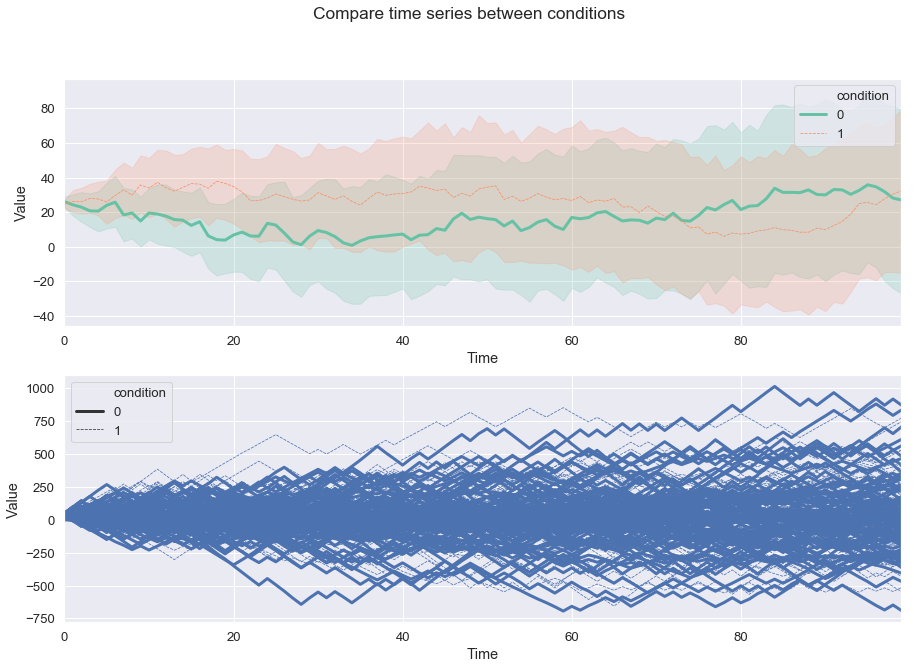

In [22]:
sns.set(font_scale=1.2)
fig,axs = plt.subplots(2, 1, figsize = (15, 10))
sns.lineplot(x='time'
             , y='value'
             , hue='condition'
             , size='condition'
             , style='condition'
             , data=df_ts
             , palette='Set2'
             , ax = axs[0]
            )
sns.lineplot(x='time'
             , y='value'
             , size='condition'
             , style='condition'
             , data=df_ts
             , palette='Set2'
             , units='individual'
             , estimator=None
             , ax = axs[1]
            )
plt.suptitle('Compare time series between conditions')
for ax in axs:
    
    ax.set_xlim(min(df_ts['time']), max(df_ts['time']))
    ax.set_xlim(min(df_ts['time']), max(df_ts['time']))
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')

plt.show()

### Visualize the relationship between variables

In [23]:
df_sy = generate_synthetic(n_categorical=3, n_scalar=3, n_rows=1000)

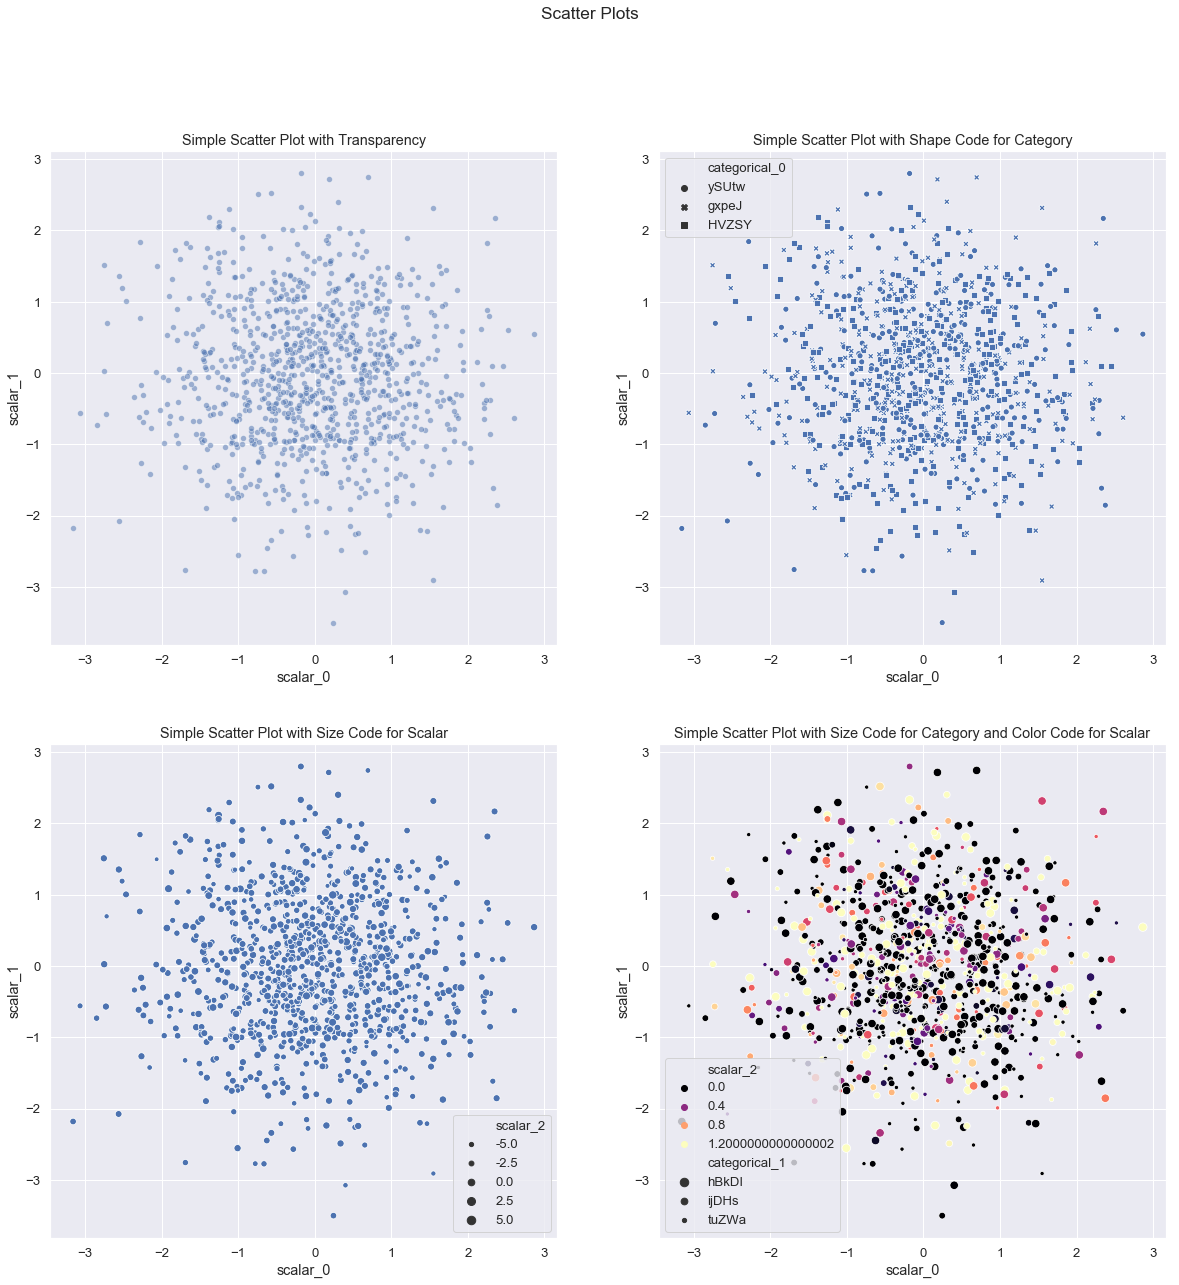

In [24]:
sns.set(font_scale=1.2)
fig, axs = plt.subplots(2, 2, figsize=(20,20))
sns.scatterplot(x='scalar_0'
                , y='scalar_1'
                , data=df_sy
                , ax = axs[0][0]
                , alpha=0.5
               )
sns.scatterplot(x='scalar_0'
                , y='scalar_1'
                , data=df_sy
                , style='categorical_0'
                , ax = axs[0][1]
               )
sns.scatterplot(x='scalar_0'
                , y='scalar_1'
                , data=df_sy
                , size='scalar_2'
                , ax = axs[1][0]
               )
sns.scatterplot(x='scalar_0'
                , y='scalar_1'
                , data=df_sy
                , size='categorical_1'
                , hue='scalar_2'
                , hue_norm=(0,1)
                , palette='magma'
                , ax = axs[1][1]
               )
axs[0][0].set_title('Simple Scatter Plot with Transparency')
axs[0][1].set_title('Simple Scatter Plot with Shape Code for Category')
axs[1][0].set_title('Simple Scatter Plot with Size Code for Scalar')
axs[1][1].set_title('Simple Scatter Plot with Size Code for Category and Color Code for Scalar')
plt.suptitle('Scatter Plots')
plt.show()

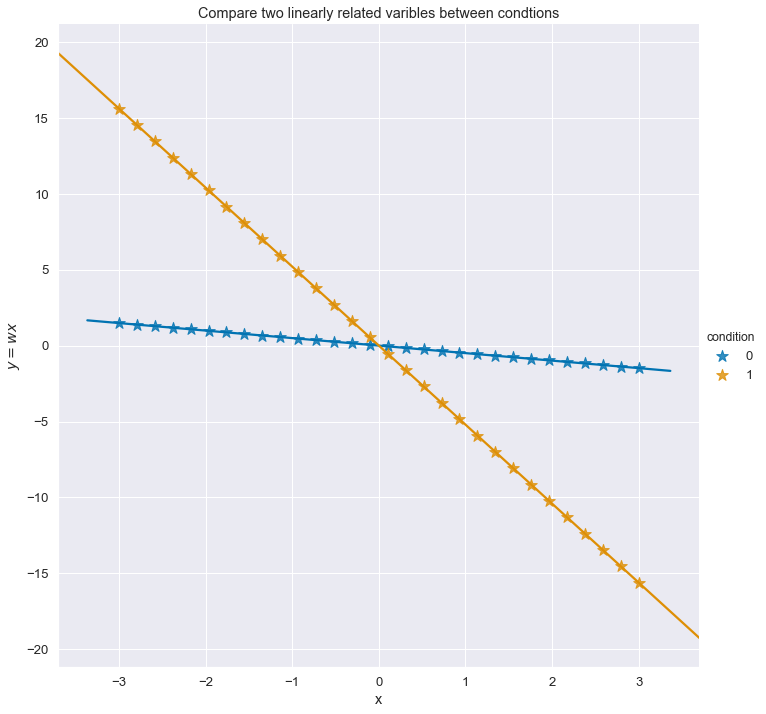

In [25]:
sns.set(font_scale=1.2, style = 'darkgrid')
sns.lmplot(x='x'
           , y='y'
           , hue='condition'
           , palette='colorblind'
           , markers='*'
           , data=df_ln
           , height=10
           , scatter_kws={'s': 150}
           )
plt.title('Compare two linearly related varibles between condtions')
plt.xlabel('x')
plt.ylabel(r'$y=wx$')
plt.show()

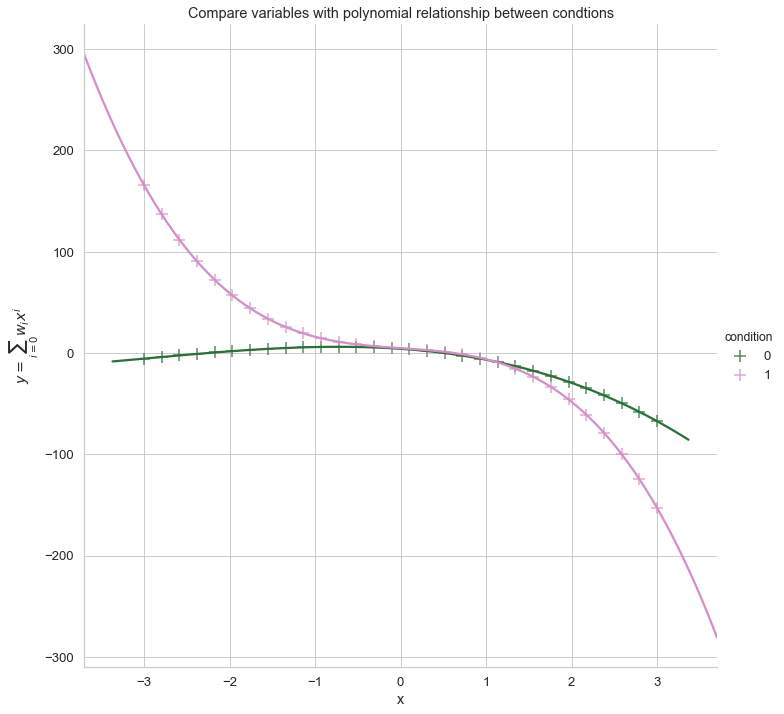

In [26]:
sns.set(font_scale=1.2, style ='whitegrid')
sns.lmplot(x='x'
           , y='y'
           , hue='condition'
           , palette='cubehelix'
           , markers='+'
           , order=3
           , data=df_pl
           , height=10
           , scatter_kws={'s': 150}
           )
plt.title('Compare variables with polynomial relationship between condtions')
plt.xlabel('x')
plt.ylabel(r'$y=\sum_{i=0}w_ix^i$')
plt.show()

In [27]:
df_sy = generate_synthetic(n_categorical=0, n_scalar=10, n_rows=10000)
df_corr = df_sy.corr()
mask = df_corr < 0

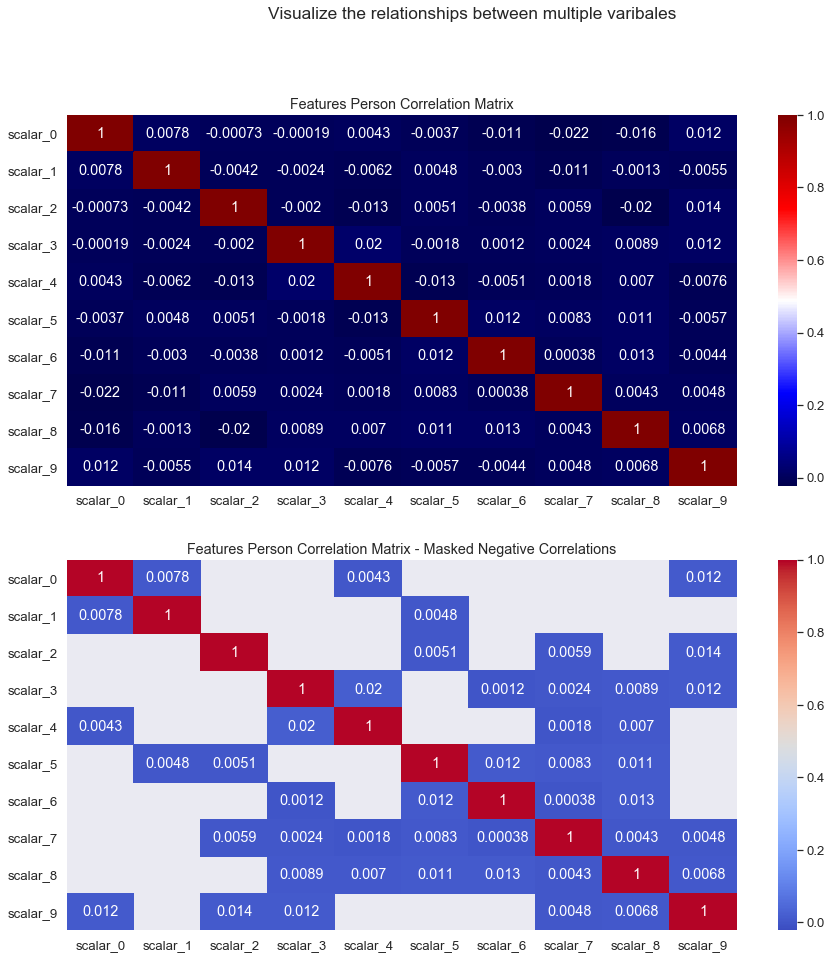

In [28]:
sns.set(font_scale=1.2)
fig, axs = plt.subplots(2,1,figsize=(15,15))
sns.heatmap(data=df_corr
            , cmap='seismic'
            , annot=True
            , ax = axs[0]
            )
sns.heatmap(data=df_corr
            , cmap='coolwarm'
            , annot=True
            , mask=mask
            , ax = axs[1]
            )
axs[0].set_title('Features Person Correlation Matrix')
axs[1].set_title('Features Person Correlation Matrix - Masked Negative Correlations')
plt.suptitle('Visualize the relationships between multiple varibales')
plt.show()

### Compare  a varibale between multiple conditions

In [29]:
df_sy = generate_synthetic(n_categorical=2, n_scalar=1, n_rows=1000)

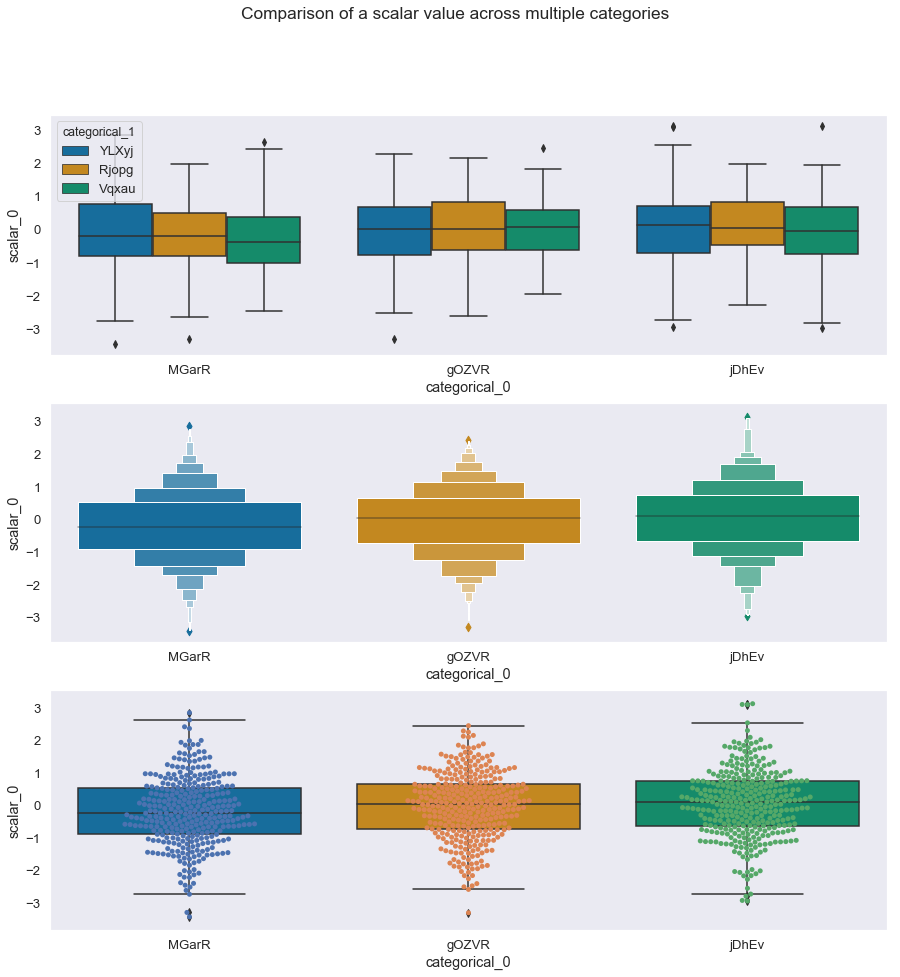

In [30]:
sns.set(font_scale=1.2, style='dark')
fig, axs = plt.subplots(3,1,figsize=(15,15))
sns.boxplot(x='categorical_0'
            , y='scalar_0' 
            , palette='colorblind'
            , hue='categorical_1'
            , ax=axs[0]
            , data=df_sy
            )
sns.boxenplot(x='categorical_0'
              , y='scalar_0' 
              , palette='colorblind'
              , ax=axs[1]
              , data=df_sy
              )
sns.boxplot(x='categorical_0'
            , y='scalar_0' 
            , palette='colorblind'
            , ax=axs[2]
            , data=df_sy
            )
sns.swarmplot(x='categorical_0'
              , y='scalar_0' 
              , cmap='colorblind'
              , ax=axs[2]
              , data=df_sy
              )

plt.suptitle('Comparison of a scalar value across multiple categories')
plt.show()

### EXERCISE 2

Using the `df_gm` formulate your own hypothesis and test it visually

* Given the data you have access to, think to a question you want, and you can, answer to
* Think at which kind of information you need to extract from the data for answering your question
* Think which visualization would best suit your purposes
* Think at which audience you want to present your visualization
* Think if you have any kind of constrains (i.e. temporal, skill ecc..) and how you can minimize their impact

It follows some informations regarding the `df_gm`

In [31]:
df_gm.head(2)

,rank,dead,online,name,level,class,id,experience,account,challenges,twitch,ladder
0,1,False,False,Tzn_NecroIsFineNow,100,Necromancer,3dcddd59f5088893f734f39686350990dae168cc4f4b00...,4250334444,TheTzn,40,thetzn,Harbinger
1,1,False,False,RaizNeverFirstQT,100,Necromancer,8f3216db5ac9106c287a834731aafc83c387138f28fc45...,4250334444,RaizQT,22,raizqt,SSF Harbinger HC


In [32]:
df_gm.dtypes

rank           int64
dead            bool
online          bool
name          object
level          int64
class         object
id            object
experience     int64
account       object
challenges     int64
twitch        object
ladder        object
dtype: object

## DATA VISUALIZATION FOR MODEL EVALUATION

In [33]:
classifiers = {'K-nearest Neighbors' : KNN(n_jobs = -1)
               , 'Logistic Regression' : LR(max_iter = 200, class_weight = 'balanced', solver='sag', n_jobs = -1)
               , 'Random Forest' : RF(class_weight = 'balanced', n_jobs = -1)
               , 'Multilayer Perceptron' :  MLPC(max_iter = 200)
              }
X, y = make_classification(n_samples = 5000, n_features=15, n_informative=5, n_redundant=5)
X_validation, y_validation, X_test, y_test = generating_validation_test(X, y)

### Visualize model performance

In [34]:
splitter = StratifiedShuffleSplit(n_splits=5)

In [35]:
scores = []
names = []
for name, classifier in classifiers.items():
    
    for train_index, test_index in splitter.split(X, y):
        
        classifier.fit(X[train_index], y[train_index])
        scores.append(classifier.score(X[test_index], y[test_index]))
        names.append(name)

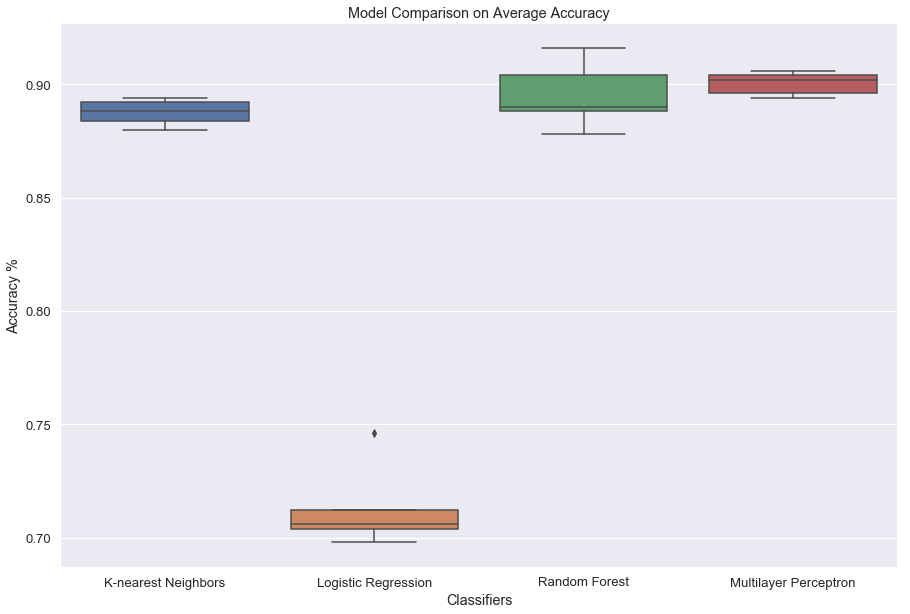

In [36]:
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize = (15, 10))
sns.boxplot(x = names
            , y = scores
            , orient = 'v'
            , ax = ax)
plt.title('Model Comparison on Average Accuracy')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy %')
plt.show()

In [37]:
splitter = StratifiedShuffleSplit(n_splits=3)
param_grid = {'hidden_layer_sizes' : [(10, 10, 10), (50, 50, 50), (100, 100, 100)]
              , 'activation' : ['tanh', 'relu']
              , 'alpha' : [1.0, 0.1, 0.001, 0.0001]
             }


In [38]:
searcher = GridSearchCV(estimator=classifiers['Multilayer Perceptron']
                        , param_grid=param_grid
                        , cv=splitter
                        , scoring = 'roc_auc'
                        , n_jobs = 2
                       )
searcher.fit(X_validation, y_validation)
best_estimator = searcher.best_estimator_
y_predicted = best_estimator.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)

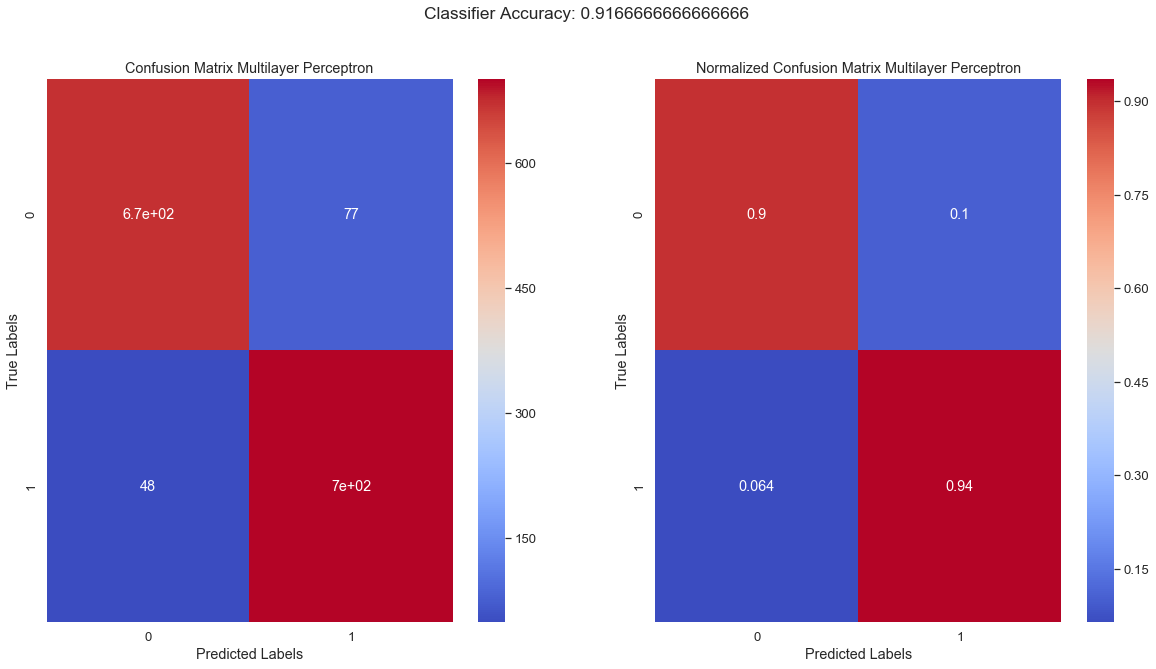

In [39]:
sns.set(font_scale=1.2)
fig, axs = plt.subplots(1, 2, figsize = (20, 10))
sns.heatmap(cm
            , annot = True
            , cmap='coolwarm'
            , ax=axs[0]
           )
sns.heatmap(cm / cm.sum(axis=1)[:, np.newaxis]
            , annot = True
            , cmap='coolwarm'
            , ax=axs[1]
           )
for ax in axs:
    
    ax.set_xticks([0.5, 1.5], ['Positive', 'Negative'])
    ax.set_yticks([0.5, 1.5], ['Negative', 'Positive'])
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')

axs[0].set_title('Confusion Matrix Multilayer Perceptron')
axs[1].set_title('Normalized Confusion Matrix Multilayer Perceptron')
plt.suptitle('Classifier Accuracy: {}'.format(best_estimator.score(X_test, y_test)))
plt.show()

### Visualize the learning process 

In [40]:
best_estimator

MLPClassifier(activation='tanh', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [41]:
loss_v = []
# accuracy
accuracy_v = []
accuracy_ts = []
# f1
f1_v = []
f1_ts = []
# precision
precision_v = []
precision_ts = []
# recall
recall_v = []
recall_ts = []

In [42]:
epochs = [i for i in range(150)]
model = MLPC(activation='relu', alpha=0.001, hidden_layer_sizes=(100, 100, 100), max_iter=1, warm_start=True)

for epoch in epochs:
    
    model.fit(X_validation, y_validation)
    v_predicted = model.predict(X_validation)
    ts_predicted = model.predict(X_test)
    loss_v.append(model.loss_)
    # accuracy
    accuracy_v.append(model.score(X_validation, y_validation))
    accuracy_ts.append(model.score(X_test, y_test))
    # f1
    f1_v.append(f1_score(v_predicted, y_validation))
    f1_ts.append(f1_score(ts_predicted, y_test))
    #precision
    precision_v.append(precision_score(v_predicted, y_validation))
    precision_ts.append(precision_score(ts_predicted, y_test))
    #recall
    recall_v.append(recall_score(v_predicted, y_validation))
    recall_ts.append(recall_score(ts_predicted, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


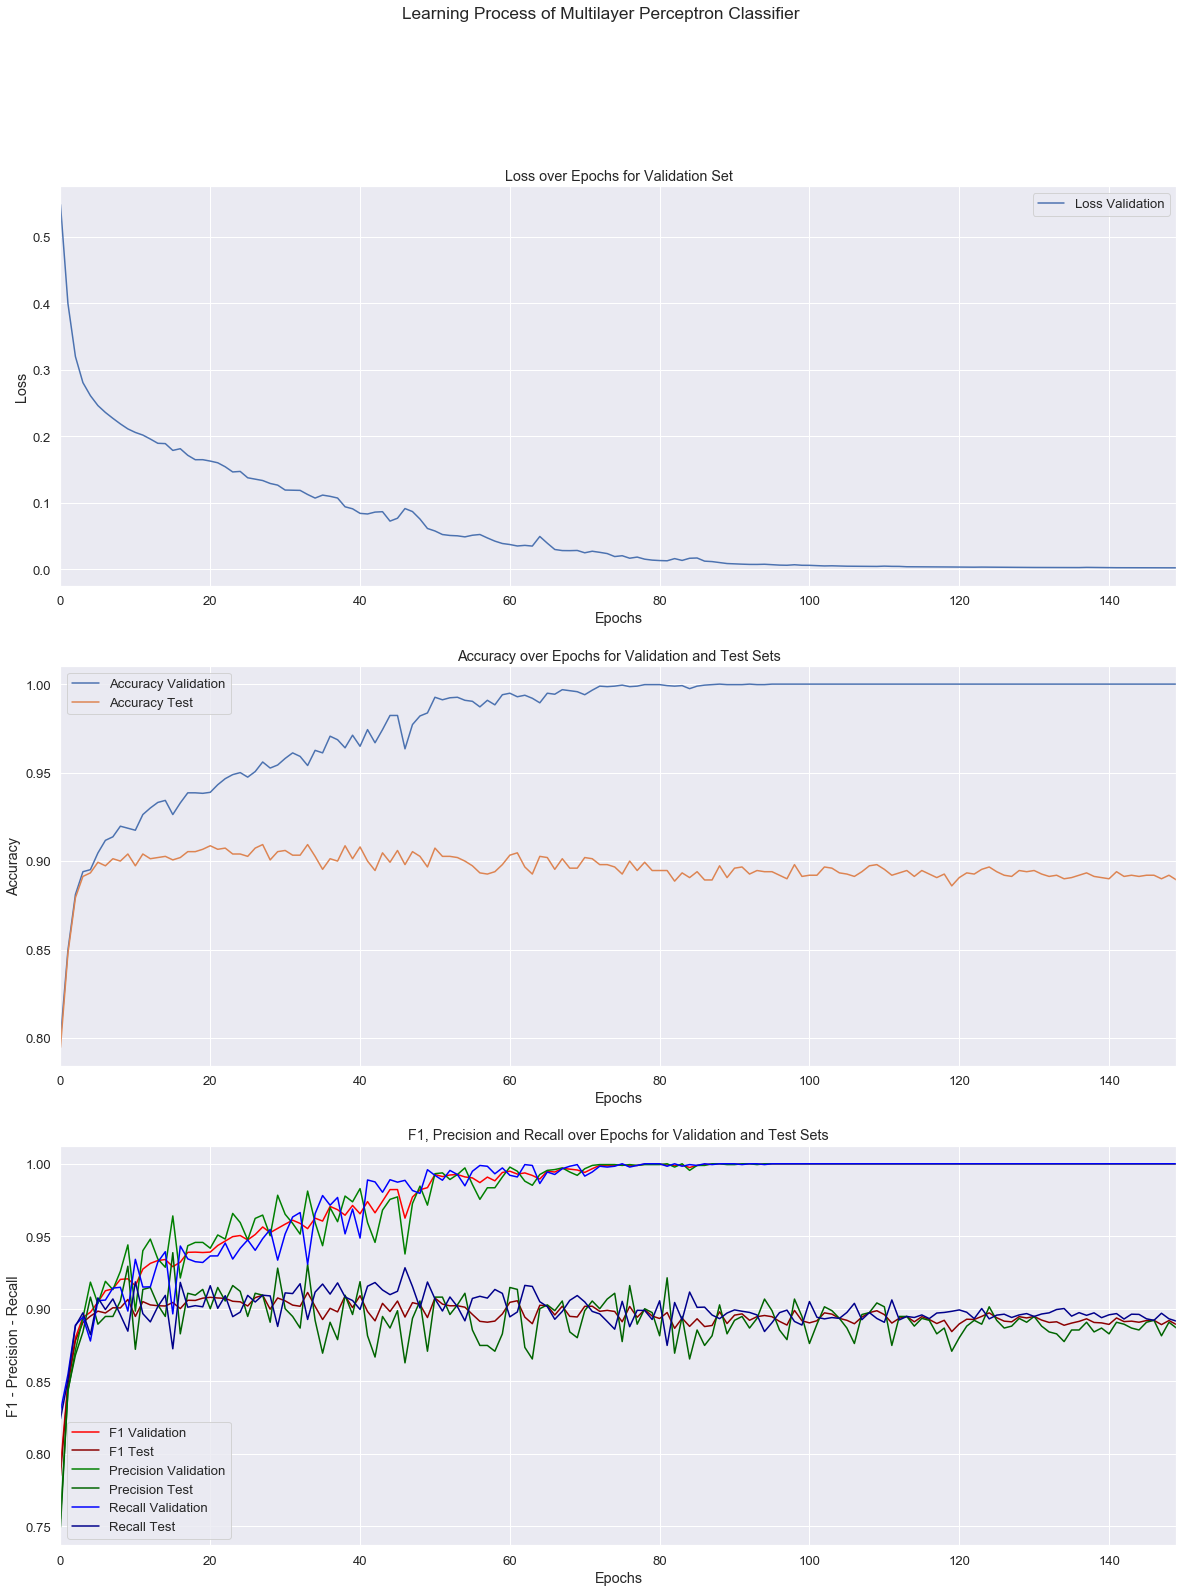

In [43]:
sns.set(font_scale=1.2)
fig, axs = plt.subplots(3, 1, figsize = (20, 25))
# loss
sns.lineplot(y=loss_v
             , x=epochs
             , label='Loss Validation'
             , ax=axs[0]
            )
# accuracy
sns.lineplot(y=accuracy_v
             , x=epochs
             , label='Accuracy Validation'
             , ax=axs[1]
            )
sns.lineplot(y=accuracy_ts
             , x=epochs
             , label = 'Accuracy Test' 
             , ax=axs[1]
            )
# f1, precision, recall
sns.lineplot(y=f1_v
             , x=epochs
             , label='F1 Validation'
             , color='red'
             , ax=axs[2]
            )
sns.lineplot(y=f1_ts
             , x=epochs
             , label = 'F1 Test'
             , color='darkred'
             , ax=axs[2]
            )
sns.lineplot(y=precision_v
             , x=epochs
             , label='Precision Validation'
             , color='green'
             , ax=axs[2]
            )
sns.lineplot(y=precision_ts
             , x=epochs
             , label='Precision Test'
             , color='darkgreen'
             , ax=axs[2]
            )
sns.lineplot(y=recall_v
             , x=epochs
             , label='Recall Validation'
             , color='blue'
             , ax=axs[2]
            )
sns.lineplot(y=recall_ts
             , x=epochs
             , label='Recall Test'
             , color='darkblue'
             , ax=axs[2]
            )

for ax in axs:
    
    ax.set_xlabel('Epochs')

    ax.set_xlim(min(epochs), max(epochs))

axs[0].set_title('Loss over Epochs for Validation Set')
axs[0].set_ylabel('Loss')
axs[1].set_title('Accuracy over Epochs for Validation and Test Sets')
axs[1].set_ylabel('Accuracy')
axs[2].set_title('F1, Precision and Recall over Epochs for Validation and Test Sets')
axs[2].set_ylabel('F1 - Precision - Recall')
plt.suptitle('Learning Process of Multilayer Perceptron Classifier')
plt.legend()
plt.show()

In [44]:
n_clusters = [i for i in range(2, 8)]
inertias = []
for n in n_clusters:
    
    clusterer = KMeans(n_clusters = n).fit(X)
    inertias.append(clusterer.inertia_)

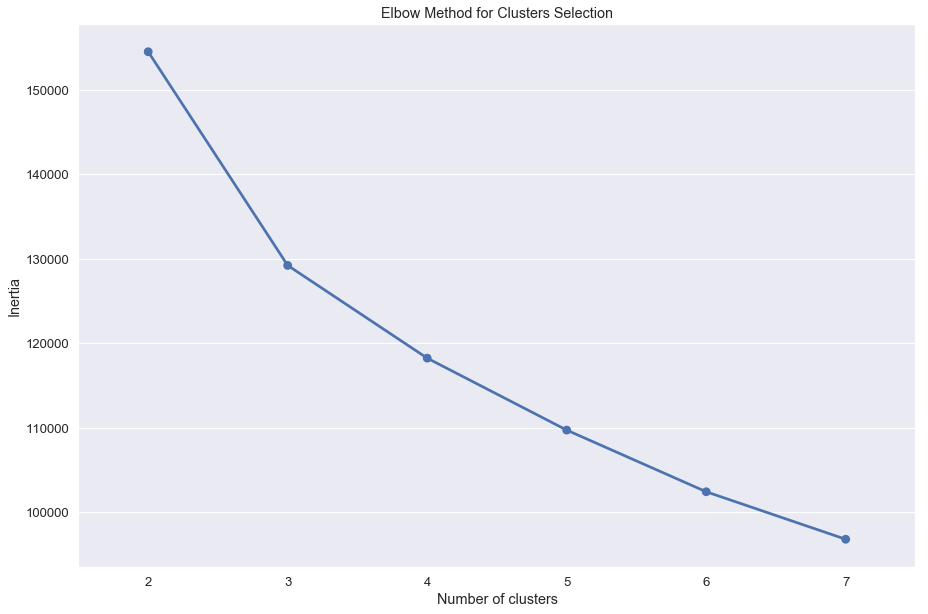

In [45]:
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(15, 10))
sns.pointplot(y=inertias
             , x=n_clusters
             , ax=ax
            )

ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia')
plt.title('Elbow Method for Clusters Selection')
plt.show()

### Visually inspect the prediction

In [46]:
y_predicted = classifiers['Logistic Regression'].fit(X_validation, y_validation).predict(X_test)
major_components = PCA(n_components = 2).fit_transform(X_test)

colors_gt = ['b' if label == 0 else 'y' for label in y_test]

colors_er = ['r' if prediction != ground_truth else 'w' for prediction, ground_truth in zip(y_predicted, y_test)]
colors_er_0 = ['r' if prediction != ground_truth and prediction == 0 else 'w' for prediction, ground_truth in zip(y_predicted, y_test)]
colors_er_1 = ['r' if prediction != ground_truth and prediction == 1 else 'w' for prediction, ground_truth in zip(y_predicted, y_test)]

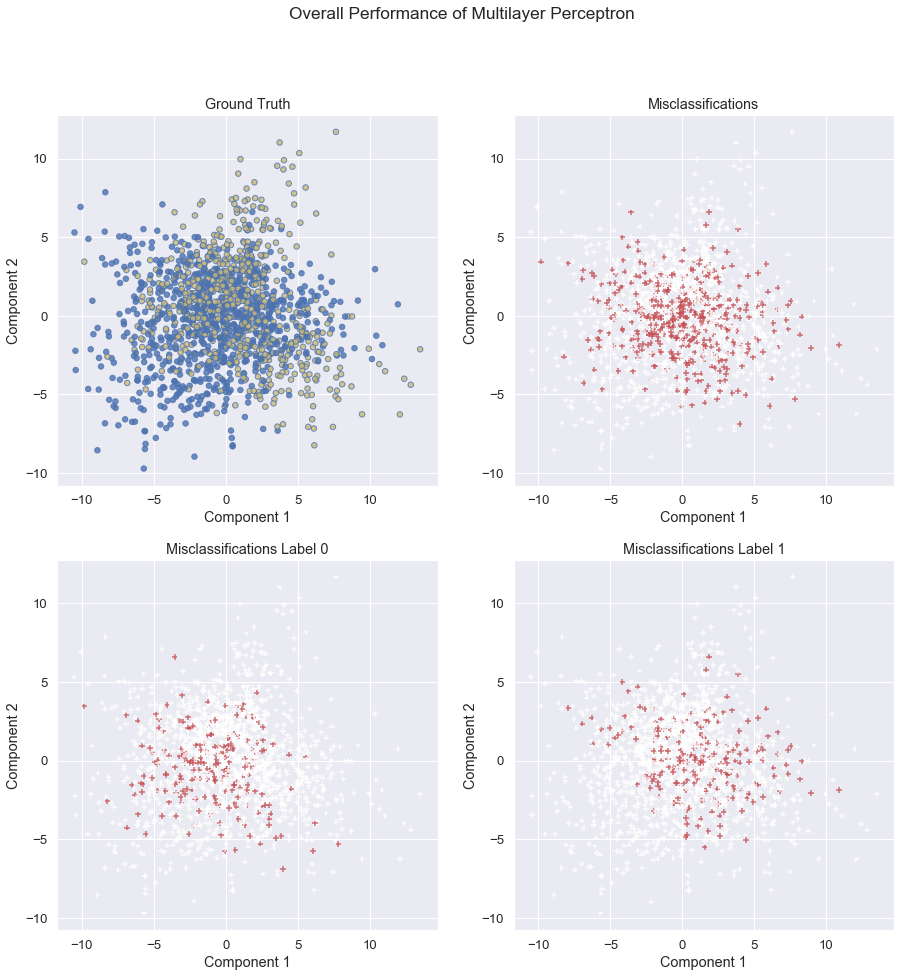

In [47]:
sns.set(font_scale=1.2)
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
sns.regplot(major_components[:,0]
            , major_components[:,1]
            , fit_reg=False
            , scatter_kws={'facecolors':colors_gt, 's':30}
            , ax=axs[0][0]
           )
sns.regplot(major_components[:,0]
            , major_components[:,1]
            , fit_reg=False
            , scatter_kws={'facecolors':colors_er, 's':30}
            , ax=axs[0][1]
            , marker='+'
           )
sns.regplot(major_components[:,0]
            , major_components[:,1]
            , fit_reg=False
            , scatter_kws={'facecolors':colors_er_0, 's':30}
            , ax=axs[1][0]
            , marker='+'
           )
sns.regplot(major_components[:,0]
            , major_components[:,1]
            , fit_reg=False
            , scatter_kws={'facecolors':colors_er_1, 's':30}
            , ax=axs[1][1]
            , marker='+'
           )
for ax in axs.flatten():
    
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')

axs[0][0].set_title('Ground Truth')
axs[0][1].set_title('Misclassifications')
axs[1][0].set_title('Misclassifications Label 0')
axs[1][1].set_title('Misclassifications Label 1')

plt.suptitle('Overall Performance of Multilayer Perceptron')
plt.show()

In [48]:
locations_er_0 = []
locations_er_1 = []
for location, prediction, ground_truth in zip(major_components, y_predicted, y_test):
    
    if prediction != ground_truth and prediction == 0:
        locations_er_0.append(location)
    elif prediction != ground_truth and prediction == 1:
        locations_er_1.append(location)

locations_er_0 = np.array(locations_er_0)
locations_er_1 = np.array(locations_er_1)

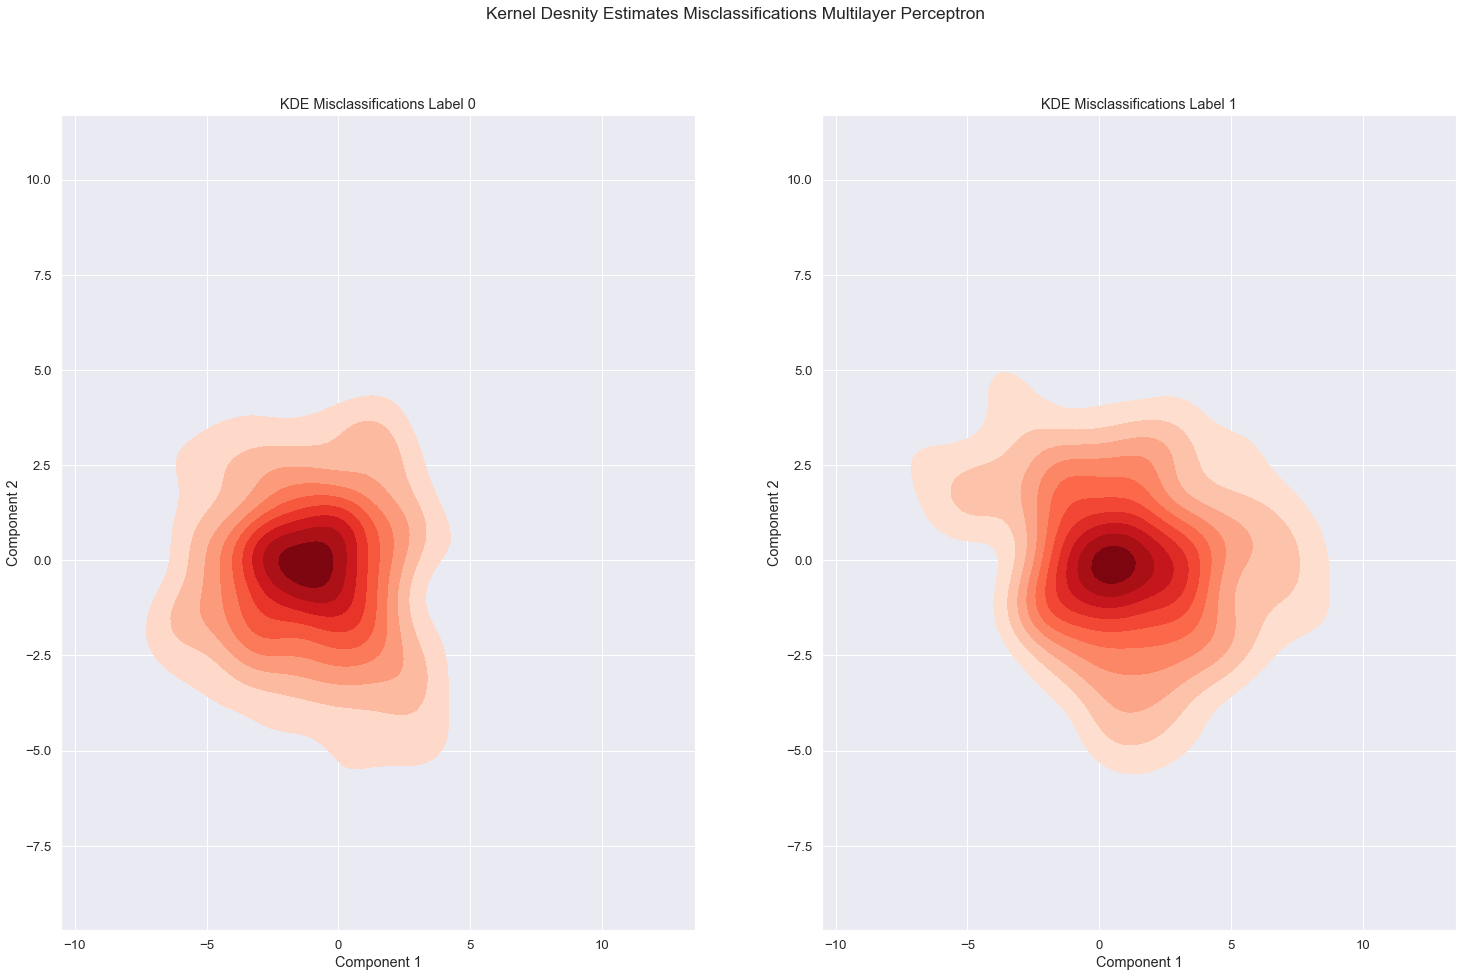

In [49]:
sns.set(font_scale=1.2)
fig, axs = plt.subplots(1, 2, figsize=(25, 15))
sns.kdeplot(locations_er_0[:,0]
        , locations_er_0[:,1]
        , cmap='Reds'
        , shade=True
        , shade_lowest=False
        , ax=axs[0]
        )
sns.kdeplot(locations_er_1[:,0]
        , locations_er_1[:,1]
        , cmap='Reds'
        , shade=True
        , shade_lowest=False
        , ax=axs[1]
        )

for ax in axs.flatten():
    
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_xlim(min(major_components[:,0]), max(major_components[:,0]))
    ax.set_ylim(min(major_components[:,1]), max(major_components[:,1]))

axs[0].set_title('KDE Misclassifications Label 0')
axs[1].set_title('KDE Misclassifications Label 1')
plt.suptitle('Kernel Desnity Estimates Misclassifications Multilayer Perceptron')
plt.show()

In [50]:
components_corr = np.append(X_test, major_components, axis = 1)
components_corr = pd.DataFrame(components_corr).corr()
components_corr = components_corr[[15, 16]]

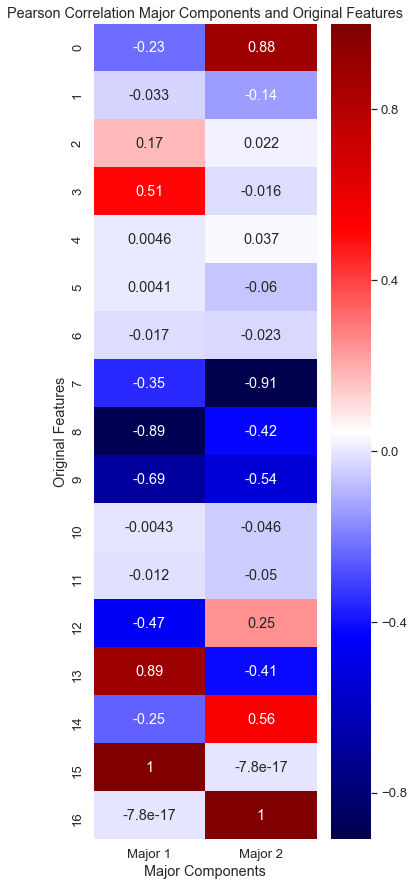

In [51]:
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(5, 15))
sns.heatmap(components_corr
            , annot = True
            , cmap='seismic'
            , ax = ax
           )
plt.title('Pearson Correlation Major Components and Original Features')
ax.set_xticklabels(labels=['Major 1', 'Major 2'])
ax.set_xlabel('Major Components')
ax.set_ylabel('Original Features')
plt.show()

### EXERCISE 2

You can find in the following cell arrays of preprocessed data for training your model in the attempt to predict if a player died or not.

In case you prefer doing your own preprocessing (suggested) you can use the `df_ml`, which has been already prepared for being in a machine learning friendly format.

The goal here is to pick a strategy for solving the classification problem and using a visual for validating the outcomes of your strategy.

In [52]:
df_ml.head(2)

,rank,dead,online,name,level,experience,account,challenges,twitch,class_Ascendant,...,class_Scion,class_Shadow,class_Slayer,class_Templar,class_Trickster,class_Witch,ladder_Harbinger,ladder_Hardcore Harbinger,ladder_SSF Harbinger,ladder_SSF Harbinger HC
0,1,0,0,18,100,4250334444,6,40,1,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,16,100,4250334444,6,22,1,0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
df_ml.dtypes

rank                         int64
dead                         int64
online                       int64
name                         int64
level                        int64
experience                   int64
account                      int64
challenges                   int64
twitch                       int64
class_Ascendant              int64
class_Assassin               int64
class_Berserker              int64
class_Champion               int64
class_Chieftain              int64
class_Deadeye                int64
class_Duelist                int64
class_Elementalist           int64
class_Gladiator              int64
class_Guardian               int64
class_Hierophant             int64
class_Inquisitor             int64
class_Juggernaut             int64
class_Marauder               int64
class_Necromancer            int64
class_Occultist              int64
class_Pathfinder             int64
class_Raider                 int64
class_Ranger                 int64
class_Saboteur      

In [54]:
X, y = generate_X_y(df_ml, list(df_ml.drop('dead', 1)), 'dead')
X_validation, y_validation, X_test, y_test = generating_validation_test(X, y)